In [1273]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from random import choice, randint

In [1274]:
df1=pd.read_csv(r"C:\Users\Admin\Downloads\Bangalore_1990_2022_BangaloreCity.csv")

In [1275]:
df1.head()

,time,tavg,tmin,tmax,prcp
0,1/1/1990,22.9,19.1,28.4,NaN
1,2/1/1990,21.7,NaN,26.5,0.0
2,3/1/1990,21.0,16.4,26.5,0.0
3,4/1/1990,20.8,NaN,27.4,0.0
4,5/1/1990,20.4,14.2,26.1,0.0


In [1276]:
df1.isnull().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

In [1277]:
df1['tavg']=df1['tavg'].fillna(df1['tavg'].mean())
df1['tmin']=df1['tmin'].fillna(df1['tmin'].mean())
df1['tmax']=df1['tmax'].fillna(df1['tmax'].mean())
df1['prcp']=df1['prcp'].fillna(df1['prcp'].mean())


In [1278]:
df1['time'] = pd.to_datetime(df1['time'], format='%d/%m/%Y', errors='coerce')

# Convert 'date' column to datetime format


In [1279]:
df1.head()

,time,tavg,tmin,tmax,prcp
0,1990-01-01,22.9,19.100000,28.4,4.414119
1,1990-01-02,21.7,19.385131,26.5,0.000000
2,1990-01-03,21.0,16.400000,26.5,0.000000
3,1990-01-04,20.8,19.385131,27.4,0.000000
4,1990-01-05,20.4,14.200000,26.1,0.000000


In [1280]:
df1.rename(columns={'time': 'weather_date'}, inplace=True)

In [1281]:
df1['City']='Banglore'
df1.head()

,weather_date,tavg,tmin,tmax,prcp,City
0,1990-01-01,22.9,19.100000,28.4,4.414119,Banglore
1,1990-01-02,21.7,19.385131,26.5,0.000000,Banglore
2,1990-01-03,21.0,16.400000,26.5,0.000000,Banglore
3,1990-01-04,20.8,19.385131,27.4,0.000000,Banglore
4,1990-01-05,20.4,14.200000,26.1,0.000000,Banglore


In [1282]:
temp_df=df1["tavg"].copy()
temp_df.head()

0    22.9
1    21.7
2    21.0
3    20.8
4    20.4
Name: tavg, dtype: float64

In [1283]:
df1['prcp']=df1['prcp'].apply(lambda x:1 if x>0 else 0)
df1.head()

,weather_date,tavg,tmin,tmax,prcp,City
0,1990-01-01,22.9,19.100000,28.4,1,Banglore
1,1990-01-02,21.7,19.385131,26.5,0,Banglore
2,1990-01-03,21.0,16.400000,26.5,0,Banglore
3,1990-01-04,20.8,19.385131,27.4,0,Banglore
4,1990-01-05,20.4,14.200000,26.1,0,Banglore


In [1284]:
temp_df=df1["tavg"].copy()
temp_df.head()

0    22.9
1    21.7
2    21.0
3    20.8
4    20.4
Name: tavg, dtype: float64

In [1285]:
data_train=pd.read_csv(r"C:\Users\Admin\Downloads\Data_Train.csv")
data_train.rename(columns={'Date_of_Journey': 'date'}, inplace=True)
data_train['date'] = pd.to_datetime(data_train['date'], format='%d/%m/%Y', errors='coerce')


In [1286]:
# data_train["Precp_Source"]=

In [1287]:
data_train.head()

,Airline,date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [1288]:
data_train["TempAvg"]=temp_df
data_train.head()

,Airline,date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,TempAvg
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22.9
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,21.7
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,21.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,20.8
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,20.4


In [1289]:
# Create a list of cities
cities = ['Chennai', 'Bangalore', 'Bhubaneswar', 'Delhi']

# Generate synthetic data
data = []
for _ in range(1000):
    # Generate random date and time
    date = datetime(2024, 1, 1) + timedelta(days=randint(0, 1095), hours=randint(0, 23))
    
    # Select a random city
    city = choice(cities)
    
    # Generate random weather condition (assuming binary weather, e.g., sunny or rainy)
    weather = choice(['Sunny', 'Rainy'])
    
    data.append([date, city, weather])

In [1290]:
# Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=['journey_date', 'city', 'weather'])

# Save the DataFrame to a CSV file
df.to_csv('weather_data.csv', index=False)

In [1291]:
# Encode categorical variables like 'city'
XX= pd.get_dummies(df[['journey_date', 'city']], columns=['city'])
yy = df['weather']

In [1292]:
data_train['Source'] = data_train['Source'].replace('New Delhi', 'Delhi')
data_train['Destination'] = data_train['Destination'].replace('New Delhi', 'Delhi')

In [1293]:
data_train['Source'] = data_train['Source'].replace('Kolkata', 'Bhubhneshwar')
data_train['Destination'] = data_train['Destination'].replace('Kolkata', 'Bhubhneshwar')

In [1294]:
data_train = data_train.drop(data_train[data_train['Source'] == 'Hyderabad'].index)
data_train = data_train.drop(data_train[data_train['Destination'] == 'Hyderabad'].index)

In [1295]:
df2=pd.read_csv(r"C:\Users\Admin\Downloads\Mumbai_1990_2022_Santacruz.csv")
df2['tavg']=df2['tavg'].fillna(df2['tavg'].mean())
df2['tmin']=df2['tmin'].fillna(df2['tmin'].mean())
df2['tmax']=df2['tmax'].fillna(df2['tmax'].mean())
df2['prcp']=df2['prcp'].fillna(df2['prcp'].mean())
df2['City']='Mumbai'
df2['prcp']=df2['prcp'].apply(lambda x:1 if x>0 else 0)
df2.head()


,time,tavg,tmin,tmax,prcp,City
0,1/1/1990,23.2,17.0,32.31504,0,Mumbai
1,2/1/1990,22.2,16.5,29.90000,0,Mumbai
2,3/1/1990,21.8,16.3,30.70000,0,Mumbai
3,4/1/1990,25.4,17.9,31.80000,0,Mumbai
4,5/1/1990,26.5,19.3,33.70000,0,Mumbai


In [1296]:
df2['time'] = pd.to_datetime(df2['time'], format='%d/%m/%Y', errors='coerce')


In [1297]:
df2.head()

,time,tavg,tmin,tmax,prcp,City
0,1990-01-01,23.2,17.0,32.31504,0,Mumbai
1,1990-01-02,22.2,16.5,29.90000,0,Mumbai
2,1990-01-03,21.8,16.3,30.70000,0,Mumbai
3,1990-01-04,25.4,17.9,31.80000,0,Mumbai
4,1990-01-05,26.5,19.3,33.70000,0,Mumbai


In [1298]:
df2.rename(columns={'time': 'weather_date'}, inplace=True)

In [1299]:
df3=pd.read_csv(r"C:\Users\Admin\Downloads\Delhi_NCR_1990_2022_Safdarjung.csv")

In [1300]:
df3['tavg']=df3['tavg'].fillna(df3['tavg'].mean())
df3['tavg']=df3['tavg'].fillna(df3['tavg'].mean())
df3['tmin']=df3['tmin'].fillna(df3['tmin'].mean())
df3['tmax']=df3['tmax'].fillna(df3['tmax'].mean())
df3['prcp']=df3['prcp'].fillna(df3['prcp'].mean())
df3['City']='Delhi'
df3['prcp']=df3['prcp'].apply(lambda x:1 if x>0 else 0)
df3.head()
print(df3.shape)

(11894, 6)


In [1301]:

df3['time'] = pd.to_datetime(df3['time'], format='%d/%m/%Y', errors='coerce')

In [1302]:
df3.rename(columns={'time': 'weather_date'}, inplace=True)

In [1303]:
df4=pd.read_csv(r"C:\Users\Admin\Downloads\Chennai_1990_2022_Madras.csv")

In [1304]:
df4['tavg']=df4['tavg'].fillna(df4['tavg'].mean())
df4['tavg']=df4['tavg'].fillna(df4['tavg'].mean())
df4['tmin']=df4['tmin'].fillna(df4['tmin'].mean())
df4['tmax']=df4['tmax'].fillna(df4['tmax'].mean())
df4['prcp']=df4['prcp'].fillna(df4['prcp'].mean())
df4['City']='Chennai'
df4['prcp']=df4['prcp'].apply(lambda x:1 if x>0 else 0)
df4.head()

,time,tavg,tmin,tmax,prcp,City
0,1/1/1990,25.2,22.80000,28.4,1,Chennai
1,2/1/1990,24.9,21.70000,29.1,0,Chennai
2,3/1/1990,25.6,21.40000,29.8,0,Chennai
3,4/1/1990,25.7,24.38277,28.7,0,Chennai
4,5/1/1990,25.5,20.70000,28.4,0,Chennai


In [1305]:
df5=pd.read_csv(r"C:\Users\Admin\Downloads\weather_Bhubhneshwar_1990_2022.csv")

In [1306]:
df5['tavg']=df5['tavg'].fillna(df5['tavg'].mean())
df5['tavg']=df5['tavg'].fillna(df5['tavg'].mean())
df5['tmin']=df5['tmin'].fillna(df5['tmin'].mean())
df5['tmax']=df5['tmax'].fillna(df5['tmax'].mean())
df5['prcp']=df5['prcp'].fillna(df5['prcp'].mean())
df5['City']='Bhubhneshwar'
df5['prcp']=df5['prcp'].apply(lambda x:1 if x>0 else 0)
df5=df5.drop(columns=['snow','wdir','wspd','wpgt','pres','tsun'])
df5.head()


,time,tavg,tmin,tmax,prcp,City
0,1/1/1990,20.1,22.237247,28.000000,0,Bhubhneshwar
1,1/2/1990,20.7,16.400000,32.996686,0,Bhubhneshwar
2,1/3/1990,20.7,16.000000,27.400000,0,Bhubhneshwar
3,1/4/1990,18.8,22.237247,28.000000,0,Bhubhneshwar
4,1/5/1990,19.8,11.000000,28.200000,0,Bhubhneshwar


In [1307]:
df5['time'] = pd.to_datetime(df5['time'], format='%d/%m/%Y', errors='coerce')

In [1308]:

df4['time'] = pd.to_datetime(df4['time'], format='%d/%m/%Y', errors='coerce')


In [1309]:
df5.rename(columns={'time': 'weather_date'}, inplace=True)

In [1310]:
df4.rename(columns={'time': 'weather_date'}, inplace=True)

In [1311]:
df1.head()

,weather_date,tavg,tmin,tmax,prcp,City
0,1990-01-01,22.9,19.100000,28.4,1,Banglore
1,1990-01-02,21.7,19.385131,26.5,0,Banglore
2,1990-01-03,21.0,16.400000,26.5,0,Banglore
3,1990-01-04,20.8,19.385131,27.4,0,Banglore
4,1990-01-05,20.4,14.200000,26.1,0,Banglore


In [1312]:
df1=df1.drop(["tavg","tmin","tmax","City"],axis=1)
df1.rename(columns={'weather_date': 'date'}, inplace=True)
df1.head()

,date,prcp
0,1990-01-01,1
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [1313]:
df2=df2.drop(["tavg","tmin","tmax","City"],axis=1)
df2.rename(columns={'weather_date': 'date'}, inplace=True)
df2.head()

,date,prcp
0,1990-01-01,0
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [1314]:
df3=df3.drop(["tavg","tmin","tmax","City"],axis=1)
df3.rename(columns={'weather_date': 'date'}, inplace=True)
df3.head()

,date,prcp
0,1990-01-01,0
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [1315]:
df4=df4.drop(["tavg","tmin","tmax","City"],axis=1)
df4.rename(columns={'weather_date': 'date'}, inplace=True)
df4.head()

,date,prcp
0,1990-01-01,1
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [1316]:
df5=df5.drop(["tavg","tmin","tmax","City"],axis=1)
df5.rename(columns={'weather_date': 'date'}, inplace=True)
df5.head()

,date,prcp
0,1990-01-01,0
1,1990-02-01,0
2,1990-03-01,0
3,1990-04-01,0
4,1990-05-01,0


In [1317]:
data_train=data_train.sort_values(by="date")
data_train.head()


,Airline,date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,TempAvg
3400,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,22:50,20:20 02 Mar,21h 30m,1 stop,No info,25735,26.1
3931,IndiGo,2019-03-01,Chennai,Bhubhneshwar,MAA ? CCU,13:20,15:35,2h 15m,non-stop,No info,7295,23.4
7902,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,16:55,00:45 02 Mar,7h 50m,1 stop,No info,26890,22.3
10149,Air India,2019-03-01,Banglore,Delhi,BLR ? VGA ? VTZ ? DEL,10:30,17:45,7h 15m,2 stops,Change airports,17461,22.3
2556,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,16:55,10:25 02 Mar,17h 30m,1 stop,1 Long layover,25735,19.1


In [1318]:
date=data_train["date"].copy()
date.head()

3400    2019-03-01
3931    2019-03-01
7902    2019-03-01
10149   2019-03-01
2556    2019-03-01
Name: date, dtype: datetime64[ns]

In [1319]:
df1=pd.merge(df1,date,on="date",how="inner")
df1=df1.sort_values(by="date")
df1.head()
print(df1.shape)

(5204, 2)


In [1320]:
print(df1["date"].duplicated().sum())
df1=df1.drop_duplicates("date")
print(df1["date"].duplicated().sum())
df1.shape

5184
0


(20, 2)

In [1321]:
df2=pd.merge(df2,date,on="date",how="inner")
df2=df2.sort_values(by="date")
df2.head()

,date,prcp
0,2019-03-01,1
119,2019-03-01,1
120,2019-03-01,1
121,2019-03-01,1
122,2019-03-01,1


In [1322]:
print(df2["date"].duplicated().sum())
df2=df2.drop_duplicates("date")
print(df2["date"].duplicated().sum())
df2.shape

5184
0


(20, 2)

In [1323]:
df3=pd.merge(df3,date,on="date",how="inner")
df3=df3.sort_values(by="date")
df3.head()

,date,prcp
0,2019-03-01,1
119,2019-03-01,1
120,2019-03-01,1
121,2019-03-01,1
122,2019-03-01,1


In [1324]:
print(df3["date"].duplicated().sum())
df3=df3.drop_duplicates("date")
print(df3["date"].duplicated().sum())
print(df3.shape)
print(df3)

5184
0
(20, 2)
           date  prcp
0    2019-03-01     1
388  2019-03-03     1
712  2019-03-06     1
1023 2019-03-09     0
1190 2019-03-12     1
1390 2019-04-01     0
1533 2019-04-03     1
1626 2019-04-06     0
1744 2019-04-09     1
1825 2019-04-12     1
2020 2019-05-01     1
2152 2019-05-03     0
2355 2019-05-06     1
2745 2019-05-09     1
3058 2019-05-12     1
3350 2019-06-01     1
3671 2019-06-03     1
4090 2019-06-06     1
4568 2019-06-09     1
5044 2019-06-12     1


In [1325]:
df4=pd.merge(df4,date,on="date",how="inner")
df4=df4.sort_values(by="date")
df4.head()

,date,prcp
0,2019-03-01,0
119,2019-03-01,0
120,2019-03-01,0
121,2019-03-01,0
122,2019-03-01,0


In [1326]:
print(df4["date"].duplicated().sum())
df4=df4.drop_duplicates("date")
print(df4["date"].duplicated().sum())
df4.shape

5184
0


(20, 2)

In [1327]:
df5=pd.merge(df4,date,on="date",how="inner")
df5=df5.sort_values(by="date")
df5.head()

,date,prcp
0,2019-03-01,0
119,2019-03-01,0
120,2019-03-01,0
121,2019-03-01,0
122,2019-03-01,0


In [1328]:
print(df5["date"].duplicated().sum())
df5=df5.drop_duplicates("date")
print(df5["date"].duplicated().sum())
df5.shape

5184
0


(20, 2)

In [1329]:
teme=data_train.copy()
teme["SNo."]=range(1, len(teme) + 1)

In [1330]:
## for precipitation of source

teme1=pd.merge(teme[teme['Source'] == 'Banglore'],df1,on="date",how="left")
teme2=pd.merge(teme[teme['Source'] == 'Mumbai'],df2,on="date",how="left")
teme3=pd.merge(teme[teme['Source'] == 'Chennai'],df4,on="date",how="left")
teme4=pd.merge(teme[teme['Source'] == 'Delhi'],df3,on="date",how="left")
teme6=pd.merge(teme[teme['Source'] == 'Bhubhneshwar'],df5,on="date",how="left")
teme5=teme[~teme['Source'].isin(['Banglore', 'Delhi', 'Chennai', 'Mumbai'])]

teme=pd.concat([teme1,teme2,teme3,teme4,teme6,teme5])


In [1331]:
teme.rename(columns={'prcp': 'Precipitation_Src'}, inplace=True)
teme=teme.sort_values(by="SNo.")

In [1332]:
print(teme)

          Airline       date        Source   Destination  \
0     Jet Airways 2019-03-01      Banglore         Delhi   
0          IndiGo 2019-03-01       Chennai  Bhubhneshwar   
1     Jet Airways 2019-03-01      Banglore         Delhi   
2       Air India 2019-03-01      Banglore         Delhi   
3     Jet Airways 2019-03-01      Banglore         Delhi   
...           ...        ...           ...           ...   
2870     SpiceJet 2019-06-27  Bhubhneshwar      Banglore   
1881     SpiceJet 2019-06-27  Bhubhneshwar      Banglore   
4534  Jet Airways 2019-06-27         Delhi        Cochin   
4535    Air India 2019-06-27         Delhi        Cochin   
4536  Jet Airways 2019-06-27         Delhi        Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
0           BLR ? BOM ? DEL    22:50  20:20 02 Mar  21h 30m      1 stop   
0                 MAA ? CCU    13:20         15:35   2h 15m    non-stop   
1           BLR ? BOM ? DEL    16:55  00:45 02 Mar   7

In [1333]:
temp=data_train.copy()
temp["SNo."]=range(1, len(temp) + 1)

In [1334]:
## for precipitation of destination

temp1=pd.merge(temp[temp['Destination'] == 'Banglore'],df1,on="date",how="left")
temp2=pd.merge(temp[temp['Destination'] == 'Mumbai'],df2,on="date",how="left")
temp3=pd.merge(temp[temp['Destination'] == 'Chennai'],df4,on="date",how="left")
temp4=pd.merge(temp[temp['Destination'] == 'Delhi'],df3,on="date",how="left")
temp5=temp[~temp['Destination'].isin(['Banglore', 'Delhi', 'Chennai', 'Mumbai'])]

temp=pd.concat([temp1,temp2,temp3,temp4,temp5])

In [1335]:
temp.rename(columns={'prcp': 'Precipitation_Destination'}, inplace=True)
temp=temp.sort_values(by="SNo.")

In [1336]:

print(temp)

          Airline       date        Source   Destination  \
0     Jet Airways 2019-03-01      Banglore         Delhi   
3931       IndiGo 2019-03-01       Chennai  Bhubhneshwar   
1     Jet Airways 2019-03-01      Banglore         Delhi   
2       Air India 2019-03-01      Banglore         Delhi   
3     Jet Airways 2019-03-01      Banglore         Delhi   
...           ...        ...           ...           ...   
1879  Jet Airways 2019-06-27         Delhi        Cochin   
2870     SpiceJet 2019-06-27  Bhubhneshwar      Banglore   
4593  Jet Airways 2019-06-27         Delhi        Cochin   
8918    Air India 2019-06-27         Delhi        Cochin   
8251  Jet Airways 2019-06-27         Delhi        Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
0           BLR ? BOM ? DEL    22:50  20:20 02 Mar  21h 30m      1 stop   
3931              MAA ? CCU    13:20         15:35   2h 15m    non-stop   
1           BLR ? BOM ? DEL    16:55  00:45 02 Mar   7

In [1337]:
temp=temp.drop(["Airline","date","Source", "Destination","Route","Dep_Time","Arrival_Time","Duration","Total_Stops","Additional_Info","Price","TempAvg"],axis=1)
print(temp)

      SNo.  Precipitation_Destination
0        1                        1.0
3931     2                        NaN
1        3                        1.0
2        4                        1.0
3        5                        1.0
...    ...                        ...
1879  9982                        NaN
2870  9983                        NaN
4593  9984                        NaN
8918  9985                        NaN
8251  9986                        NaN

[9986 rows x 2 columns]


In [1338]:
final=pd.merge(teme,temp,on="SNo.",how="inner")
print(final)

           Airline       date        Source   Destination  \
0      Jet Airways 2019-03-01      Banglore         Delhi   
1           IndiGo 2019-03-01       Chennai  Bhubhneshwar   
2      Jet Airways 2019-03-01      Banglore         Delhi   
3        Air India 2019-03-01      Banglore         Delhi   
4      Jet Airways 2019-03-01      Banglore         Delhi   
...            ...        ...           ...           ...   
12852     SpiceJet 2019-06-27  Bhubhneshwar      Banglore   
12853     SpiceJet 2019-06-27  Bhubhneshwar      Banglore   
12854  Jet Airways 2019-06-27         Delhi        Cochin   
12855    Air India 2019-06-27         Delhi        Cochin   
12856  Jet Airways 2019-06-27         Delhi        Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0            BLR ? BOM ? DEL    22:50  20:20 02 Mar  21h 30m      1 stop   
1                  MAA ? CCU    13:20         15:35   2h 15m    non-stop   
2            BLR ? BOM ? DEL    16:55  

In [1339]:
data_train=final.copy()
data_train

,Airline,date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,TempAvg,SNo.,Precipitation_Src,Precipitation_Destination
0,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,22:50,20:20 02 Mar,21h 30m,1 stop,No info,25735,26.1,1,1.0,1.0
1,IndiGo,2019-03-01,Chennai,Bhubhneshwar,MAA ? CCU,13:20,15:35,2h 15m,non-stop,No info,7295,23.4,2,0.0,NaN
2,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,16:55,00:45 02 Mar,7h 50m,1 stop,No info,26890,22.3,3,1.0,1.0
3,Air India,2019-03-01,Banglore,Delhi,BLR ? VGA ? VTZ ? DEL,10:30,17:45,7h 15m,2 stops,Change airports,17461,22.3,4,1.0,1.0
4,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,16:55,10:25 02 Mar,17h 30m,1 stop,1 Long layover,25735,19.1,5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12852,SpiceJet,2019-06-27,Bhubhneshwar,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24.9,9983,NaN,NaN
12853,SpiceJet,2019-06-27,Bhubhneshwar,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24.9,9983,NaN,NaN
12854,Jet Airways,2019-06-27,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,23.7,9984,NaN,NaN
12855,Air India,2019-06-27,Delhi,Cochin,DEL ? BLR ? COK,13:30,23:00,9h 30m,1 stop,No info,8907,25.8,9985,NaN,NaN


In [1340]:
data_train.drop(columns=['Precipitation_Destination'],axis=1,inplace=True)

In [1341]:
data_train = data_train.dropna(subset=['Precipitation_Src'], how='all')

In [1342]:
data_train

,Airline,date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,TempAvg,SNo.,Precipitation_Src
0,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,22:50,20:20 02 Mar,21h 30m,1 stop,No info,25735,26.1,1,1.0
1,IndiGo,2019-03-01,Chennai,Bhubhneshwar,MAA ? CCU,13:20,15:35,2h 15m,non-stop,No info,7295,23.4,2,0.0
2,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,16:55,00:45 02 Mar,7h 50m,1 stop,No info,26890,22.3,3,1.0
3,Air India,2019-03-01,Banglore,Delhi,BLR ? VGA ? VTZ ? DEL,10:30,17:45,7h 15m,2 stops,Change airports,17461,22.3,4,1.0
4,Jet Airways,2019-03-01,Banglore,Delhi,BLR ? BOM ? DEL,16:55,10:25 02 Mar,17h 30m,1 stop,1 Long layover,25735,19.1,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11611,Air India,2019-06-12,Delhi,Cochin,DEL ? AMD ? BOM ? COK,05:00,07:40 13 Jun,26h 40m,2 stops,No info,10231,22.3,8844,1.0
11612,Jet Airways,2019-06-12,Bhubhneshwar,Banglore,CCU ? DEL ? BLR,09:35,23:35,14h,1 stop,No info,12692,23.4,8845,1.0
11614,Vistara,2019-06-12,Bhubhneshwar,Banglore,CCU ? DEL ? BLR,17:00,10:45 13 Jun,17h 45m,1 stop,No info,8452,29.3,8846,1.0
11616,Multiple carriers,2019-06-12,Delhi,Cochin,DEL ? BOM ? COK,18:15,01:30 13 Jun,7h 15m,1 stop,No info,13377,22.4,8847,1.0


In [1343]:
data_train["Source"].value_counts()

Source
Delhi           2183
Bhubhneshwar    1656
Banglore        1181
Chennai          184
Name: count, dtype: int64

In [1344]:
data_train["Destination"].value_counts()

Destination
Cochin          2183
Banglore        1656
Delhi           1181
Bhubhneshwar     184
Name: count, dtype: int64

In [1345]:
source_zero_mask = data_train['Precipitation_Src'] == 0.0


# Count the number of True values across columns
columns_with_zero = (source_zero_mask).sum()
print(columns_with_zero)

354


In [1346]:
rows_with_zero_source_precipitation = data_train[source_zero_mask]

print(rows_with_zero_source_precipitation)

                      Airline       date        Source   Destination  \
1                      IndiGo 2019-03-01       Chennai  Bhubhneshwar   
48    Vistara Premium economy 2019-03-01       Chennai  Bhubhneshwar   
49                   SpiceJet 2019-03-01       Chennai  Bhubhneshwar   
50                     IndiGo 2019-03-01  Bhubhneshwar      Banglore   
63                  Air India 2019-03-01       Chennai  Bhubhneshwar   
...                       ...        ...           ...           ...   
5778                 SpiceJet 2019-05-09      Banglore         Delhi   
5789              Jet Airways 2019-05-09      Banglore         Delhi   
5804                  Vistara 2019-05-09      Banglore         Delhi   
5806                   IndiGo 2019-05-09      Banglore         Delhi   
5831              Jet Airways 2019-05-09      Banglore         Delhi   

          Route Dep_Time  Arrival_Time Duration Total_Stops  \
1     MAA ? CCU    13:20         15:35   2h 15m    non-stop   
48    MAA

In [1347]:
lessthan15=data_train['TempAvg']<15

rows_winter=data_train[lessthan15]
print(rows_winter)

Empty DataFrame
Columns: [Airline, date, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price, TempAvg, SNo., Precipitation_Src]
Index: []


In [1348]:
source_one_mask = data_train['Precipitation_Src'] == 1.0


# Filter rows where both source and destination precipitation are 1.0
rows_with_both_one_precipitation = data_train[source_one_mask]

print(rows_with_both_one_precipitation)


                 Airline       date        Source Destination  \
0            Jet Airways 2019-03-01      Banglore       Delhi   
2            Jet Airways 2019-03-01      Banglore       Delhi   
3              Air India 2019-03-01      Banglore       Delhi   
4            Jet Airways 2019-03-01      Banglore       Delhi   
5              Air India 2019-03-01      Banglore       Delhi   
...                  ...        ...           ...         ...   
11611          Air India 2019-06-12         Delhi      Cochin   
11612        Jet Airways 2019-06-12  Bhubhneshwar    Banglore   
11614            Vistara 2019-06-12  Bhubhneshwar    Banglore   
11616  Multiple carriers 2019-06-12         Delhi      Cochin   
11617        Jet Airways 2019-06-12      Banglore       Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0            BLR ? BOM ? DEL    22:50  20:20 02 Mar  21h 30m      1 stop   
2            BLR ? BOM ? DEL    16:55  00:45 02 Mar   7h 50m      1

In [1349]:
modified_data = data_train.copy()

In [1350]:
modified_data.drop(columns=['Additional_Info'], axis=1, inplace=True)

In [1351]:
modified_data["Journey_day"] = pd.to_datetime(modified_data.date, format="%d/%m/%Y").dt.day

In [1352]:

modified_data["Journey_month"] = pd.to_datetime(modified_data["date"], format = "%d/%m/%Y").dt.month

In [1353]:
modified_data.drop(["date"], axis = 1, inplace = True)

In [1354]:
modified_data["Dep_hour"] = pd.to_datetime(modified_data["Dep_Time"]).dt.hour

# Extracting Minutes
modified_data["Dep_min"] = pd.to_datetime(modified_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
modified_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\1063993096.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_data["Dep_hour"] = pd.to_datetime(modified_data["Dep_Time"]).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\1063993096.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_data["Dep_min"] = pd.to_datetime(modified_data["Dep_Time"]).dt.minute


In [1355]:
# Extracting Hours
modified_data["Arrival_hour"] = pd.to_datetime(modified_data.Arrival_Time).dt.hour

# Extracting Minutes
modified_data["Arrival_min"] = pd.to_datetime(modified_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
modified_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\2555762621.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_data["Arrival_hour"] = pd.to_datetime(modified_data.Arrival_Time).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\2555762621.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  modified_data["Arrival_min"] = pd.to_datetime(modified_data.Arrival_Time).dt.minute


In [1356]:
duration = list(modified_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding duration_hours and duration_mins list to train_data dataframe

modified_data["Duration_hours"] = duration_hours
modified_data["Duration_mins"] = duration_mins

In [1357]:
modified_data.drop(["Duration"], axis = 1, inplace = True)

In [1358]:

Airline = modified_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)
Airline = Airline.apply(lambda x: x.map({True: 1, False: 0}))

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [1359]:
modified_data["Source"].value_counts()

Source
Delhi           2183
Bhubhneshwar    1656
Banglore        1181
Chennai          184
Name: count, dtype: int64

In [1360]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = modified_data[["Source"]]

Source = pd.get_dummies(Source)
Source = Source.apply(lambda x: x.map({True: 1, False: 0}))

Source.head(60)

,Source_Banglore,Source_Bhubhneshwar,Source_Chennai,Source_Delhi
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,0,0,0,1
9,0,0,0,1


In [1361]:
modified_data["Destination"].value_counts()

Destination
Cochin          2183
Banglore        1656
Delhi           1181
Bhubhneshwar     184
Name: count, dtype: int64

In [1362]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = modified_data[["Destination"]]

Destination = pd.get_dummies(Destination)
Destination= Destination.apply(lambda x: x.map({True: 1, False: 0}))

Destination.head()

,Destination_Banglore,Destination_Bhubhneshwar,Destination_Cochin,Destination_Delhi
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [1363]:
modified_data.drop(["Route"], axis = 1, inplace = True)

In [1364]:

modified_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\1503057745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modified_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [1365]:
modified_data = pd.concat([modified_data, Airline, Source, Destination], axis = 1)

In [1366]:
modified_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [1367]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [1368]:
X = modified_data.drop(['Precipitation_Src'], axis=1)
y = modified_data['Precipitation_Src']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1369]:
X = modified_data.drop(['Precipitation_Src'], axis=1)
y = modified_data['Precipitation_Src']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1370]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [1371]:
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9980787704130644


In [1372]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate other scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Confusion Matrix:
[[ 77   1]
 [  1 962]]

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [1373]:
X_train.columns

Index(['Total_Stops', 'Price', 'TempAvg', 'SNo.', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Bhubhneshwar', 'Source_Chennai', 'Source_Delhi',
       'Destination_Banglore', 'Destination_Bhubhneshwar',
       'Destination_Cochin', 'Destination_Delhi'],
      dtype='object')

In [1374]:
import pandas as pd

# Assuming you have a DataFrame named weather_data containing historical weather data
# and 'TempAvg' column representing average temperature

def predict_flight_advisability(journey_date, departure_time, temp_avg):
    # Extract features from the journey date and departure time
    journey_day = pd.to_datetime(journey_date).day
    departure_hour = pd.to_datetime(departure_time).hour
    
    # Make weather prediction based on journey date and departure time
    # Replace this with your actual weather prediction code
    weather_prediction = 1  # Example prediction
    
    # Check conditions for flight advisability
    if weather_prediction == 0 and 20 <= temp_avg <= 30:
        return "It will not rain on the day of the flight. You can book the flight."
    elif weather_prediction == 1 and (temp_avg < 20 or temp_avg > 30):
        return "It will rain on the day of the flight. It's advisable not to book the flight."
    else:
        return "It's advisable not to book the flight."

# Example usage:
journey_date = "2024-04-12"
departure_time = "10:00"

# Assuming you have already loaded and preprocessed the historical weather data
# Extract the average temperature for the given journey date from weather_data
# For example, you can use:
temp_avg = teme.loc[teme['date'] == journey_date, 'TempAvg'].iloc[100]

advisability = predict_flight_advisability(journey_date, departure_time, temp_avg)
print(advisability)



IndexError: single positional indexer is out-of-bounds

FileNotFoundError: [Errno 2] No such file or directory: 'historical_weather_data.csv'

In [ ]:

input_features = modified_data.drop(columns=['Total_Stops']).values

# Make weather prediction
weather_prediction = rf_classifier.predict(input_features)[100]

# Get temperature and precipitation values
temp_avg = modified_data['TempAvg'].iloc[100]
precipitation = modified_data['Precipitation_Src'].iloc[100]

# Check conditions for flight booking
if weather_prediction == 0 and 20 <= temp_avg <= 30 :
    print("It will not rain on the day of the flight. You can book the flight.")
elif weather_prediction==1 and (temp_avg<20 or temp_avg>30) :
    print("It will rain on the day of the flight. It's advisable not to book the flight.")
else :
    print("It's advisable not to book the flight.") 




It's advisable not to book the flight.


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
modified_data.head(70)

,Total_Stops,Price,TempAvg,SNo.,Precipitation_Src,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Bhubhneshwar,Source_Chennai,Source_Delhi,Destination_Banglore,Destination_Bhubhneshwar,Destination_Cochin,Destination_Delhi
0,1.0,25735,26.1,1,1.0,1,3,22,50,20,...,0,0,1,0,0,0,0,0,0,1
1,0.0,7295,23.4,2,0.0,1,3,13,20,15,...,0,0,0,0,1,0,0,1,0,0
2,1.0,26890,22.3,3,1.0,1,3,16,55,0,...,0,0,1,0,0,0,0,0,0,1
3,2.0,17461,22.3,4,1.0,1,3,10,30,17,...,0,0,1,0,0,0,0,0,0,1
4,1.0,25735,19.1,5,1.0,1,3,16,55,10,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2.0,26743,23.4,66,1.0,1,3,8,50,23,...,0,0,1,0,0,0,0,0,0,1
67,0.0,11934,22.3,67,1.0,1,3,7,10,10,...,0,0,1,0,0,0,0,0,0,1
68,1.0,22270,21.3,68,1.0,1,3,14,5,8,...,0,0,1,0,0,0,0,0,0,1
69,1.0,26890,27.5,69,1.0,1,3,7,0,15,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
modified_data.iloc[100]

Total_Stops                            2.0
Price                              17135.0
TempAvg                               27.4
SNo.                                 101.0
Precipitation_Src                      1.0
Journey_day                            1.0
Journey_month                          3.0
Dep_hour                               8.0
Dep_min                               50.0
Arrival_hour                          23.0
Arrival_min                           55.0
Duration_hours                        39.0
Duration_mins                          5.0
Airline_Air India                      1.0
Airline_GoAir                          0.0
Airline_IndiGo                         0.0
Airline_Jet Airways                    0.0
Airline_Jet Airways Business           0.0
Airline_Multiple carriers              0.0
Airline_SpiceJet                       0.0
Airline_Vistara                        0.0
Airline_Vistara Premium economy        0.0
Source_Banglore                        1.0
Source_Bhub

In [ ]:
modified_data.columns

Index(['Total_Stops', 'Price', 'TempAvg', 'SNo.', 'Precipitation_Src',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Bhubhneshwar', 'Source_Chennai', 'Source_Delhi',
       'Destination_Banglore', 'Destination_Bhubhneshwar',
       'Destination_Cochin', 'Destination_Delhi'],
      dtype='object')

In [ ]:

input_features = modified_data.drop(columns=['Total_Stops']).values

# Make weather prediction
weather_prediction = rf_classifier.predict(input_features)[100]

# Get temperature and precipitation values
temp_avg = modified_data['TempAvg'].iloc[100]
precipitation = modified_data['Precipitation_Src'].iloc[100]

# Check conditions for flight booking
if weather_prediction == 0 and 20 <= temp_avg <= 30 :
    print("It will not rain on the day of the flight. You can book the flight.")
elif weather_prediction==1 and (temp_avg<20 or temp_avg>30) :
    print("It will rain on the day of the flight. It's advisable not to book the flight.")
else :
    print("It's advisable not to book the flight.") 




It's advisable not to book the flight.


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import requests
import pandas as pd

# Your OpenWeather API key
api_key = "f2891f6a5ce327e0a9d15f2aa674ac2c"

# Define a function to fetch weather data for a given location and date
def fetch_weather_data(lat, lon, date):
    base_url = "https://pro.openweathermap.org/data/2.5/forecast/climate"
    url = f"{base_url}?lat={lat}&lon={lon}&appid={api_key}"
    print(url)
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        # Extract weather data for the specified date
        for item in weather_data['list']:
            if item['dt_txt'].split()[0] == date:
                return item
        return None
    else:
        return None

In [ ]:
input_features = modified_data.drop(columns=['Total_Stops']).values

# Make weather prediction
weather_prediction = rf_classifier.predict(input_features)[100]

# Get temperature and precipitation values
temp_avg = modified_data['TempAvg'].iloc[100]
precipitation = modified_data['Precipitation_Src'].iloc[100]

# Check conditions for flight booking
if weather_prediction == 0 and 20 <= temp_avg <= 30 :
    print("It will not rain on the day of the flight. You can book the flight.")
elif weather_prediction==1 and (temp_avg<20 or temp_avg>30) :
    print("It will rain on the day of the flight. It's advisable not to book the flight.")
else :
    print("It's advisable not to book the flight.") 
input_features = modified_data.drop(columns=['Total_Stops']).values

# Make weather prediction
weather_prediction = rf_classifier.predict(input_features)[100]

# Get temperature and precipitation values
temp_avg = modified_data['TempAvg'].iloc[100]
precipitation = modified_data['Precipitation_Src'].iloc[100]

# Check conditions for flight booking
if weather_prediction == 0 and 20 <= temp_avg <= 30 :
    print("It will not rain on the day of the flight. You can book the flight.")
elif weather_prediction==1 and (temp_avg<20 or temp_avg>30) :
    print("It will rain on the day of the flight. It's advisable not to book the flight.")
else :
    print("It's advisable not to book the flight.") 

It's advisable not to book the flight.
It's advisable not to book the flight.


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
modified_data.columns
modified_data.drop(columns=['TempAvg','SNo.','Precipitation_Src'],axis=1,inplace=True)

In [ ]:

testdata=pd.read_csv(r"C:\Users\Admin\Downloads\Test_set.csv")

In [ ]:
testdata['Source']=testdata['Source'].replace('Kolkata','Bhubhneshwar')
testdata['Destination']=testdata['Destination'].replace('Kolkata','Bhubhneshwar')
testdata['Source']=testdata['Source'].replace('New Delhi','Delhi')
testdata['Destination']=testdata['Destination'].replace('New Delhi','Delhi')
testdata=testdata.drop(testdata[testdata['Source']=='Mumbai'].index)
testdata=testdata.drop(testdata[testdata['Destination']=='Mumbai'].index)
testdata=testdata.drop(testdata[testdata['Source']=='Cochin'].index)
testdata=testdata.drop(testdata[testdata['Destination']=='Cochin'].index)
print(testdata.head())

     Airline Date_of_Journey        Source Destination            Route  \
1     IndiGo      12/05/2019  Bhubhneshwar    Banglore  CCU ? MAA ? BLR   
4   Air Asia      24/06/2019      Banglore       Delhi        BLR ? DEL   
6  Air India      12/03/2019      Banglore       Delhi  BLR ? TRV ? DEL   
7     IndiGo       1/05/2019  Bhubhneshwar    Banglore  CCU ? HYD ? BLR   
8     IndiGo      15/03/2019  Bhubhneshwar    Banglore        CCU ? BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
1    06:20         10:20       4h      1 stop         No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop         No info  
6    07:30         22:35   15h 5m      1 stop         No info  
7    15:15         20:30   5h 15m      1 stop         No info  
8    10:10         12:55   2h 45m    non-stop         No info  


In [ ]:
print("Test data Info")
print("-"*75)
print(testdata.info())

print()
print()

print("Null values :")
print("-"*75)
testdata.dropna(inplace = True)
print(testdata.isnull().sum())


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1 to 2667
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1340 non-null   object
 1   Date_of_Journey  1340 non-null   object
 2   Source           1340 non-null   object
 3   Destination      1340 non-null   object
 4   Route            1340 non-null   object
 5   Dep_Time         1340 non-null   object
 6   Arrival_Time     1340 non-null   object
 7   Duration         1340 non-null   object
 8   Total_Stops      1340 non-null   object
 9   Additional_Info  1340 non-null   object
dtypes: object(10)
memory usage: 115.2+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
A

In [ ]:
testdata["Journey_day"] = pd.to_datetime(testdata.Date_of_Journey, format="%d/%m/%Y").dt.day
testdata["Journey_month"] = pd.to_datetime(testdata["Date_of_Journey"], format = "%d/%m/%Y").dt.month
testdata.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
testdata["Dep_hour"] = pd.to_datetime(testdata["Dep_Time"]).dt.hour
testdata["Dep_min"] = pd.to_datetime(testdata["Dep_Time"]).dt.minute
testdata.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
testdata["Arrival_hour"] = pd.to_datetime(testdata.Arrival_Time).dt.hour
testdata["Arrival_min"] = pd.to_datetime(testdata.Arrival_Time).dt.minute
testdata.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(testdata["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
testdata["Duration_hours"] = duration_hours
testdata["Duration_mins"] = duration_mins
testdata.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(testdata["Airline"].value_counts())
Airline = pd.get_dummies(testdata["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(testdata["Source"].value_counts())
Source = pd.get_dummies(testdata["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(testdata["Destination"].value_counts())
Destination = pd.get_dummies(testdata["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
testdata.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
testdata.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([testdata, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Airline
---------------------------------------------------------------------------
Airline
Jet Airways                502
IndiGo                     266
Air India                  214
SpiceJet                   148
Vistara                    110
Air Asia                    66
GoAir                       30
Vistara Premium economy      2
Jet Airways Business         2
Name: count, dtype: int64

Source
---------------------------------------------------------------------------
Source
Bhubhneshwar    710
Banglore        555
Chennai          75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Banglore        710
Delhi           555
Bhubhneshwar     75
Name: count, dtype: int64


Shape of test data :  (1340, 21)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\711186104.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testdata["Dep_hour"] = pd.to_datetime(testdata["Dep_Time"]).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\711186104.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testdata["Dep_min"] = pd.to_datetime(testdata["Dep_Time"]).dt.minute
C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\711186104.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testdata["Arrival_hour"] = pd.to_datetime(testdata.Arrival_Time).dt.hour
C:\Users\Admin\AppData\Local\Temp

In [ ]:
X = modified_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Bhubhneshwar', 
        'Destination_Delhi','Destination_Bhubhneshwar']]
X.head()
X.dropna(inplace=True)




In [ ]:
y = modified_data.iloc[:, 1]
y.head()
y.dropna(inplace=True)

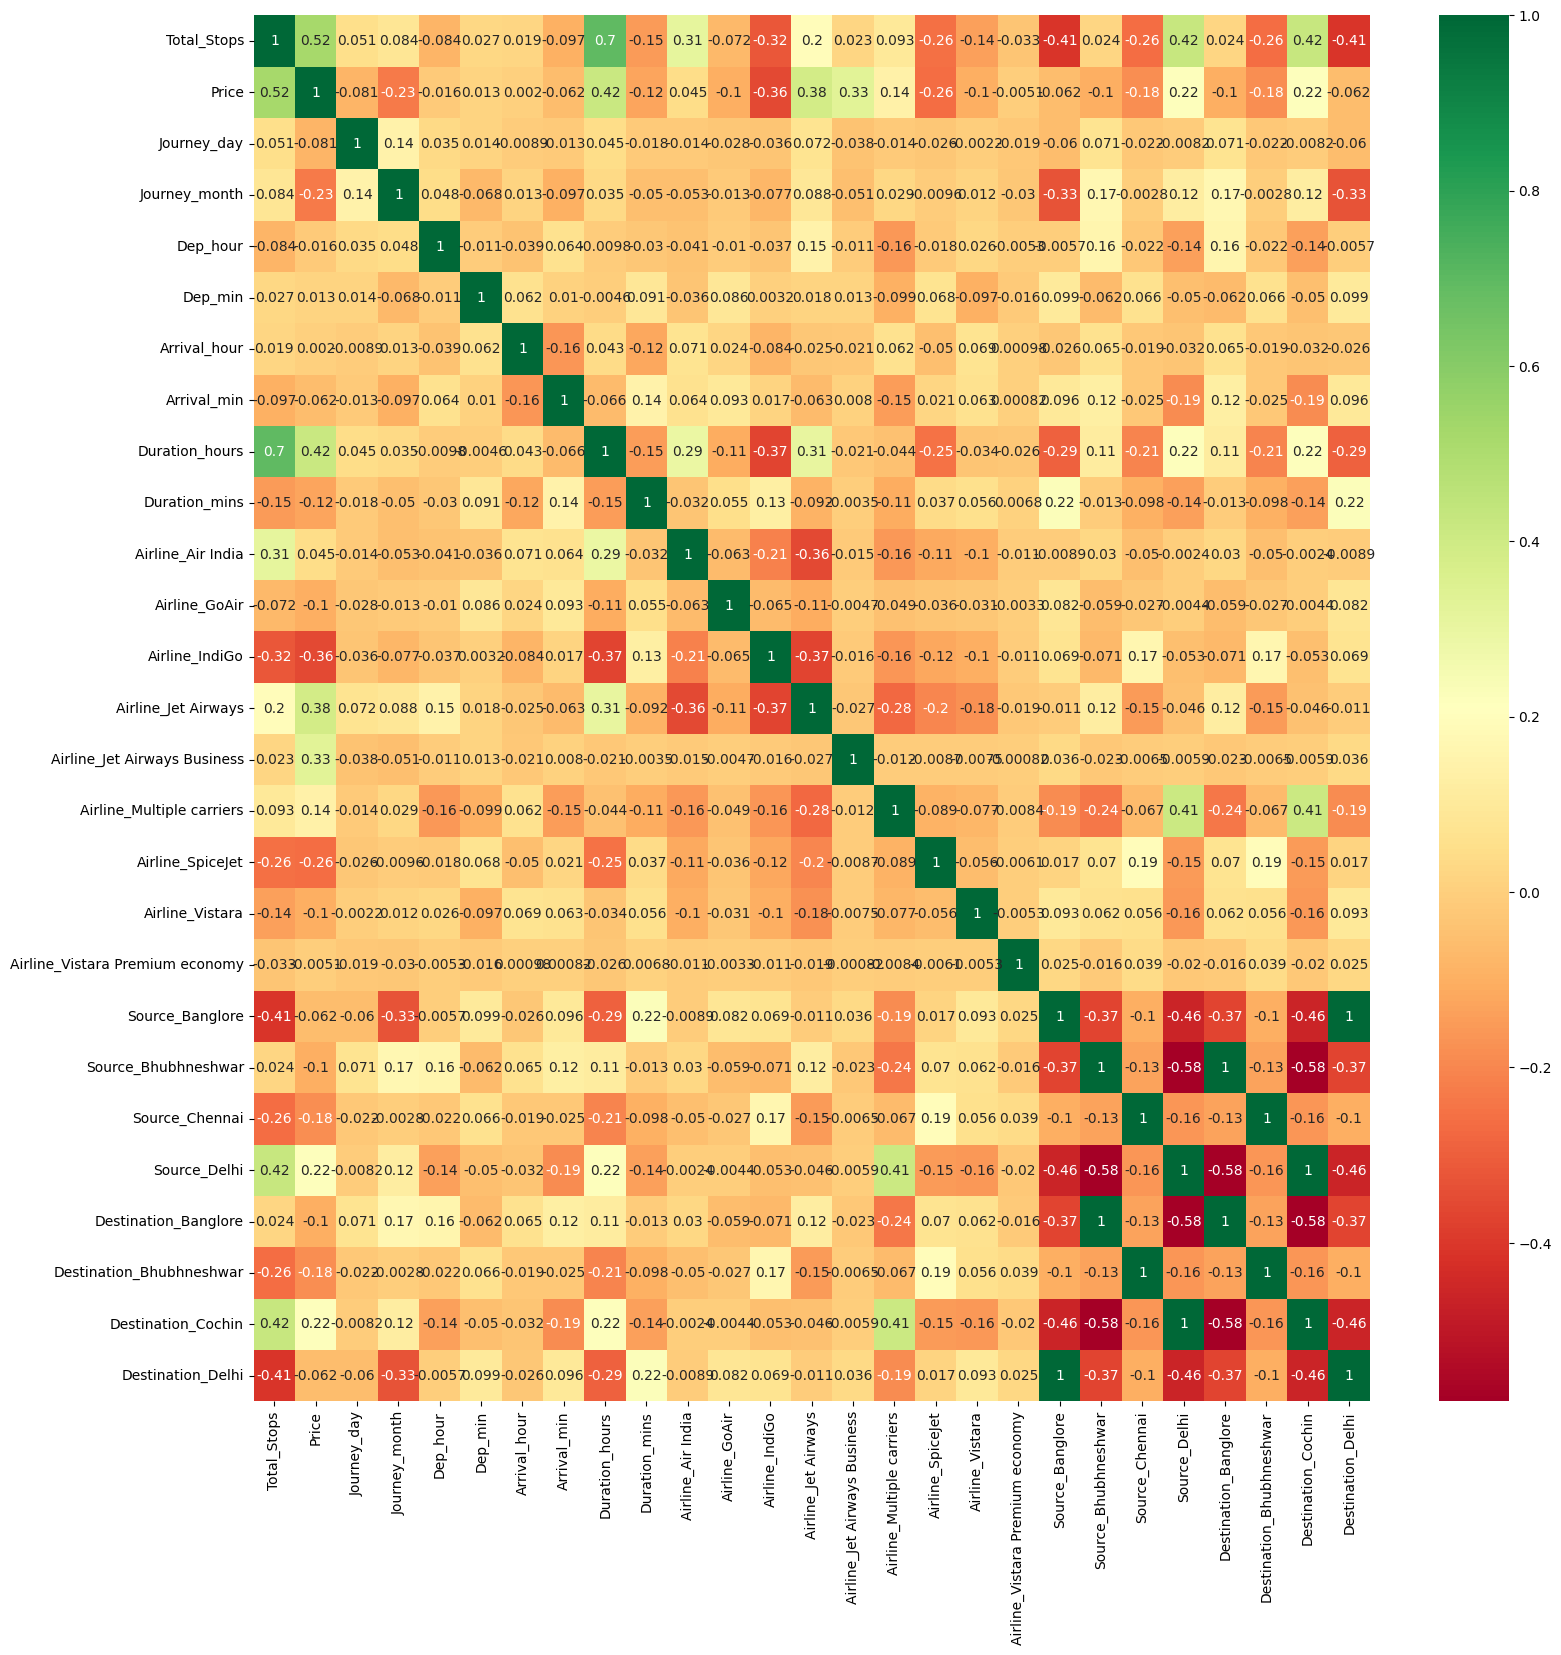

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18,18))
sns.heatmap(modified_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
y = y[:-1]  
print(X.shape, y.shape)


(5203, 23) (5203,)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)


[7.81450307e-02 1.64382719e-01 2.06041016e-01 5.00100125e-02
 3.81984927e-02 4.47850158e-02 3.65601564e-02 7.21923058e-02
 4.22944814e-02 1.30421723e-02 2.88304925e-03 1.33834449e-02
 5.44294013e-02 1.10411390e-01 1.48115353e-02 3.92861733e-03
 6.21169882e-03 1.66084924e-04 1.10175732e-03 9.99965109e-03
 9.77146792e-03 2.60174165e-02 1.23308224e-03]


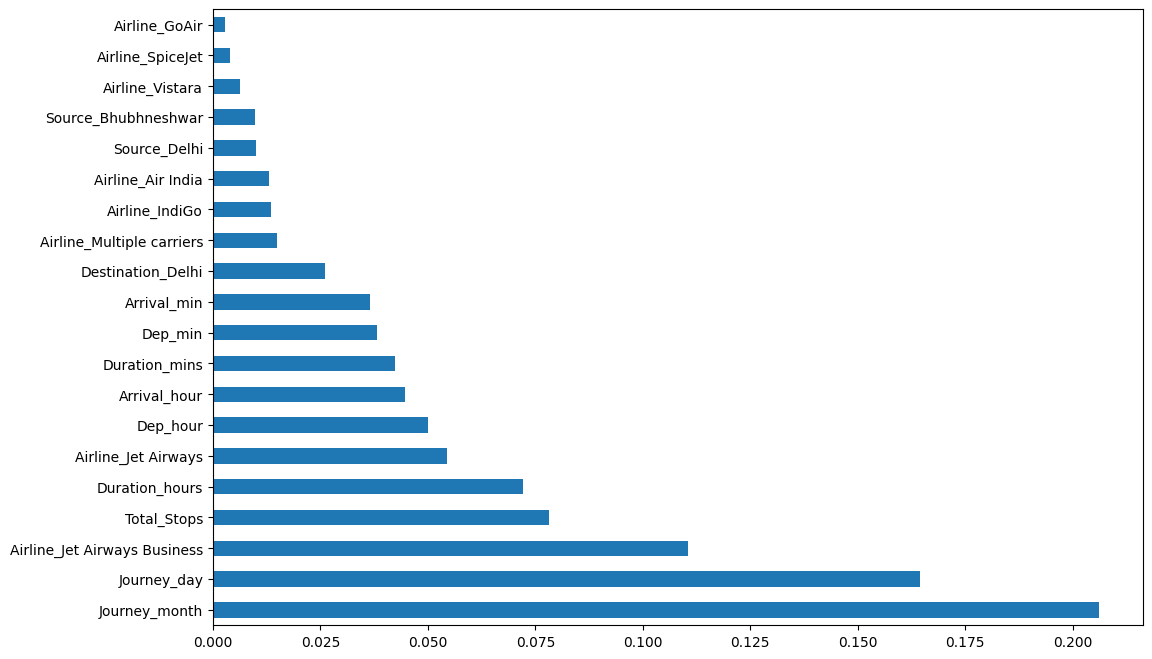

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)


In [ ]:
reg_rf.score(X_train, y_train)

0.8912330868697707

In [ ]:
reg_rf.score(X_test, y_test)

0.584750441824653

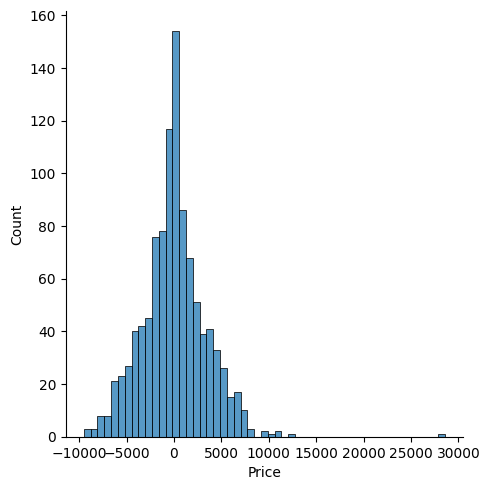

In [ ]:
sns.displot(y_test-y_pred)
plt.show()

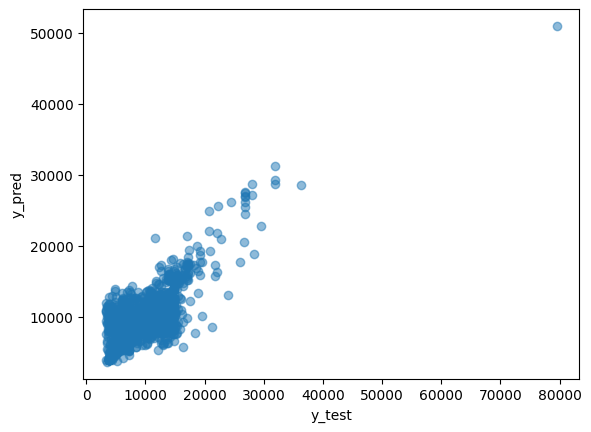

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2467.105649425156
MSE: 11379227.317835992
RMSE: 3373.3110318848444


In [ ]:
2090.5509/(max(y)-min(y))

0.027415263261425484

In [ ]:
metrics.r2_score(y_test, y_pred)

0.584750441824653

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

<Figure size 800x800 with 0 Axes>

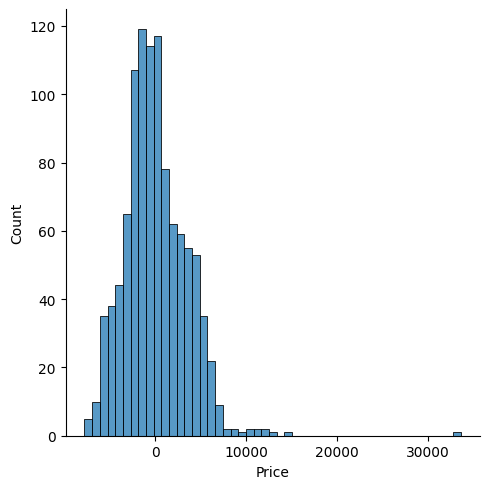

In [ ]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

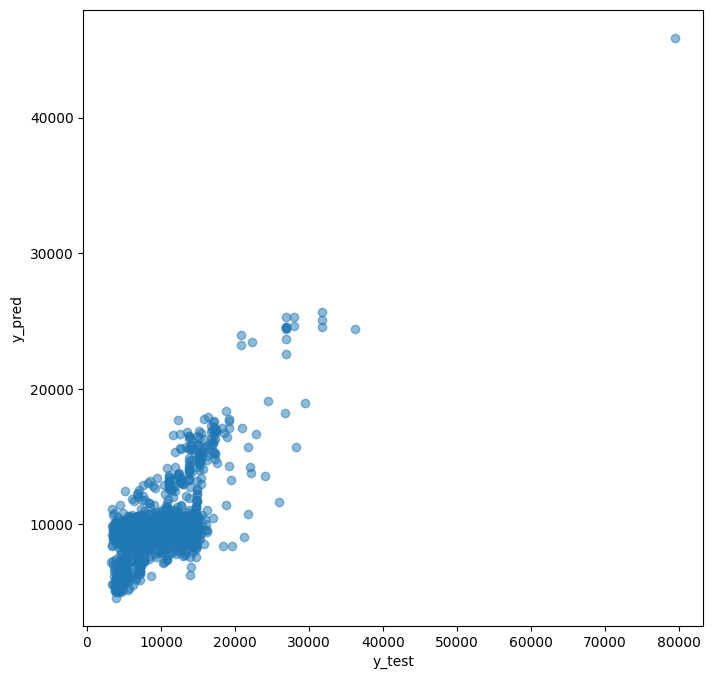

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2624.675540994324
MSE: 11859207.234316759
RMSE: 3443.719970368781


In [ ]:
import pandas as pd

# Assuming reg_rf is already trained

# Define a function to predict flight prices
def predict_flight_price(date_dep, date_arr, Total_stops, airline, Source, Destination):
    # Extract features from date of journey
    Journey_day = pd.to_datetime(date_dep).day
    Journey_month = pd.to_datetime(date_dep).month
    Dep_hour = pd.to_datetime(date_dep).hour
    Dep_min = pd.to_datetime(date_dep).minute
    Arrival_hour = pd.to_datetime(date_arr).hour
    Arrival_min = pd.to_datetime(date_arr).minute

    # Calculate duration
    dur_hour = abs(Arrival_hour - Dep_hour)
    dur_min = abs(Arrival_min - Dep_min)

    # Encode airline, source, and destination
    airlines = ['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
                'Multiple carriers' , 'SpiceJet'
                , 'Vistara', 'Vistara Premium economy']
    sources = ['Chennai', 'Delhi', 'Bhubhneshwar']
    destinations =  [ 'Bhubhneshwar', 'Delhi']

    airline_encoded = [1 if airline == a else 0 for a in airlines]
    source_encoded = [1 if Source == s else 0 for s in sources]
    destination_encoded = [1 if Destination == d else 0 for d in destinations]

    # Make prediction
    prediction = reg_rf.predict([[
        Total_stops, Journey_day, Journey_month, Dep_hour, Dep_min, Arrival_hour,
        Arrival_min, dur_hour, dur_min, *airline_encoded, *source_encoded, *destination_encoded
    ]])

    return round(prediction[0], 2)


# Example usage:
date_dep = "2024-04-10T10:00"
date_arr = "2024-04-10T12:00"
Total_stops = 1
airline = "Jet Airways"
Source = "Chennai"
Destination = "Delhi"

predicted_price = predict_flight_price(date_dep, date_arr, Total_stops, airline, Source, Destination)
print("Predicted Flight Price: Rs.", predicted_price)


Predicted Flight Price: Rs. 5849.99


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1379]:
# Create a list of cities
cities = ['Chennai', 'Bangalore', 'Bhubaneswar', 'Delhi']

# Generate synthetic data
data = []
for _ in range(1000):
    # Generate random date and time
    date = datetime(2024, 1, 1) + timedelta(days=randint(0, 1095), hours=randint(0, 23))
    
    # Select a random city
    city = choice(cities)
    
    # Generate random weather condition (assuming binary weather, e.g., sunny or rainy)
    weather = choice(['Sunny', 'Rainy'])
    
    data.append([date, city, weather])
    # Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=['journey_date', 'city', 'weather'])

# Save the DataFrame to a CSV file
df.to_csv('weather_data.csv', index=False)
# Encode categorical variables like 'city'
X_ = pd.get_dummies(df[['journey_date', 'city']], columns=['city'])
y_ = df['weather']
X_ = pd.get_dummies(X_, columns=['journey_date'])
# Train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_, y_)

RandomForestClassifier(random_state=42)

In [1375]:
def get_flight_price_prediction():
    # Get input parameters from the user
    date_dep = input("Enter the departure date and time (YYYY-MM-DDTHH:MM): ")
    date_arr = input("Enter the arrival date and time (YYYY-MM-DDTHH:MM): ")
    Total_stops = int(input("Enter the total number of stops: "))
    airline = input("Enter the airline: ")
    Source = input("Enter the source location: ")
    Destination = input("Enter the destination location: ")

    # Call the predict_flight_price function with the provided inputs
    predicted_price = predict_flight_price(date_dep, date_arr, Total_stops, airline, Source, Destination)
    
    # Print the predicted flight price
    print("Predicted Flight Price: Rs.", predicted_price)

# Call the function to get the flight price prediction
get_flight_price_prediction()





Predicted Flight Price: Rs. 4387.66


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RandomForestClassifier(random_state=42)

In [1377]:


# Get user input for journey date and city
journey_date_str = input("Enter the journey date (YYYY-MM-DD HH:MM): ")
city = input("Enter the city (Mumbai, Bangalore, Bhubaneswar, Delhi): ")

# Convert user input to datetime
journey_date = datetime.strptime(journey_date_str, '%Y-%m-%d %H:%M')

# Prepare input for prediction
input_data = {
    'journey_date': [journey_date],
    'city': [city]
}
input_df = pd.DataFrame(input_data)

# Encode categorical variables
input_df = pd.get_dummies(input_df, columns=['city'])

# Align input columns with training columns
input_df = input_df.reindex(columns=X_.columns, fill_value=0)

# Make prediction
prediction = model.predict(input_df)
# Display the prediction
print(f'Predicted weather condition: {prediction[0]}')

Predicted weather condition: Rainy


In [1382]:
def predict_flight_price_and_weather():
    # Get input parameters from the user for flight price prediction
    date_dep = input("Enter the departure date and time (YYYY-MM-DDTHH:MM): ")
    date_arr = input("Enter the arrival date and time (YYYY-MM-DDTHH:MM): ")
    Total_stops = int(input("Enter the total number of stops: "))
    airline = input("Enter the airline: ")
    Source = input("Enter the source location: ")
    Destination = input("Enter the destination location: ")

    # Call the predict_flight_price function with the provided inputs
    predicted_price = predict_flight_price(date_dep, date_arr, Total_stops, airline, Source, Destination)
    
    # Print the predicted flight price
    print("Predicted Flight Price: Rs.", predicted_price)

     #Convert datetime string to datetime object
    datetime_obj = datetime.strptime(date_dep, "%Y-%m-%dT%H:%M")

# Format datetime object as "YYYY-MM-DD HH:MM"
    journey_date_str = datetime_obj.strftime("%Y-%m-%d %H:%M")
    # Get user input for weather prediction
    # journey_date_str = input("Enter the journey date (YYYY-MM-DD HH:MM): ")
    # city = input("Enter the city (Mumbai, Bangalore, Bhubaneswar, Delhi): ")

    # Convert user input to datetime
    journey_date = datetime.strptime(journey_date_str, '%Y-%m-%d %H:%M')

    # Prepare input for weather prediction
    input_data = {
        'journey_date': [journey_date],
        'city': [Source]
    }
    input_df = pd.DataFrame(input_data)

    # Encode categorical variables
    input_df = pd.get_dummies(input_df, columns=['city'])

    # Align input columns with training columns
    input_df = input_df.reindex(columns=X_.columns, fill_value=0)

    # Make prediction
    prediction = model.predict(input_df)
    # Display the prediction
    print(f'Predicted weather condition: {prediction[0]}')

# Call the merged function to get flight price and weather predictions
if predict_flight_price_and_weather()=="Rainy":
    print("ghar Par raho ")
else:
    print("baap ka paisa udao")


Predicted Flight Price: Rs. 5849.99
Predicted weather condition: Sunny
baap ka paisa udao


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import requests
import pandas as pd

# Your OpenWeather API key
api_key = "f2891f6a5ce327e0a9d15f2aa674ac2c"

# Define a function to fetch weather data for a given location and date
def fetch_weather_data(lat, lon, date):
    base_url = "https://pro.openweathermap.org/data/2.5/forecast/climate"
    url = f"{base_url}?lat={lat}&lon={lon}&appid={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        # Extract weather data for the specified date
        for item in weather_data['list']:
            if item['dt_txt'].split()[0] == date:
                return item
        return None
    else:
        return None

# Define a function to check advisability based on temperature and precipitation
def check_advisability(weather_data):
    if not weather_data:
        return "Failed to fetch weather data."

    # Extract temperature and precipitation from the weather data
    temperature = weather_data['main']['temp']
    precipitation = weather_data['weather'][0]['main']

    # Check advisability based on temperature and precipitation
    if temperature >= 20 and temperature <= 30 and precipitation != 'Rain':
        return "It is advisable to go out on this day."
    else:
        return "It is not advisable to go out on this day."

# Example usage:
date = "2024-04-12"  # Specify the date for which you want to check advisability
lat = 20.2961  # Latitude of the location
lon = 85.8245  # Longitude of the location

# Fetch weather data for the specified date
weather_data = fetch_weather_data(lat, lon, date)

# Check advisability based on weather data
if weather_data:
    advisability = check_advisability(weather_data)
    print(advisability)
else:
    print("Failed to fetch weather data.")


Failed to fetch weather data.
